In [2]:
# Fill in your name using the format below and student ID number
your_name = "van de Waterlaat, N.P.M"
student_id = "1009357"

In [3]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [4]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [5]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [6]:
%matplotlib inline
!pip install --quiet openml
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi N.P.M, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [8]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = 'Z:/Q3/[2IMM15] - Web information retrieval and data mining/assignment-3-nickvdw'

In [7]:
# Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

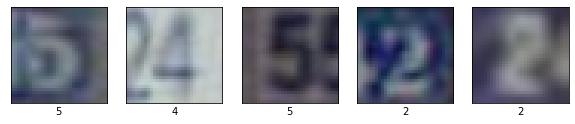

In [ ]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [13]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras import models, layers, optimizers, regularizers

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    # model.save_weights(os.path.join(base_dir, name+"_weights"+extension))
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
          shout("Model not found")
          return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
          shout("Learning curves not found")
          return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [ ]:
# Toy usage example
# Remove before submission

# def build_toy_model():
#     model = models.Sequential()
#     model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
#     model.add(layers.Dense(10, activation='relu'))
#     model.add(layers.Dense(10, activation='softmax'))
#     model.compile(optimizer='rmsprop',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # First build and store
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=True, epochs=3, batch_size=32)

In [ ]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.354295  0.376747 

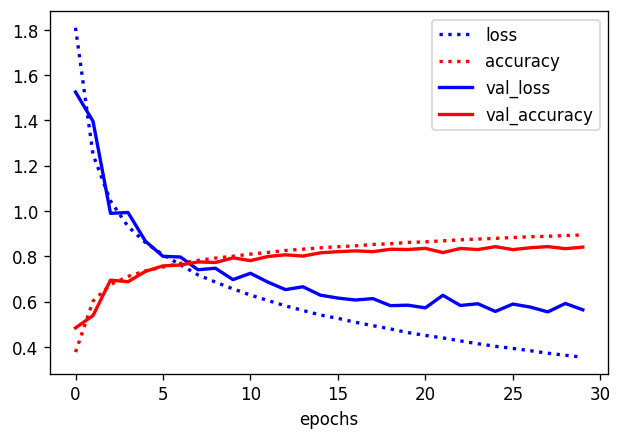

In [20]:
def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=30, batch_size=32)

answer_q_1_1 = """
I experimented with the number of nodes and layers while following a pyramid-like shape. I use this configuration since it lead to the highest accuracy.
I use ReLU since it is cheap and counters the vanishing gradient problem.
I use an adaptive optimizer so that learning is not too slow and doesn't diverge.
I tried Adagrad, Adadelta, Adam, etc. Adagrad performed the best.
I get an accuracy of 84.26%, which is decent for a simple network without regularization and not preprocessing the data.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [14]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
  return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 1,708,298
Trainable params: 1,708,298
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.351523  0.394010 

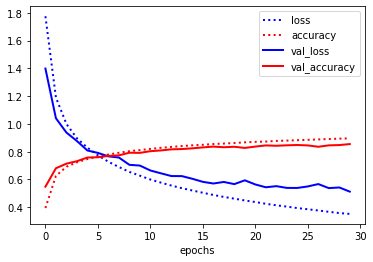

In [15]:
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=32)

answer_q_1_2 = """
I greyscaled the data and changed the reshape layer to fit the new data that has only 1 color channel.
Greyscaling the data decreases the amount of data and hence, the model trains faster (from 4 ms/step to 3 ms/step).
The accuracy has gone up to 85.46% from 84.26% while using less data.
Considering different colors might have lead to some bias in the training data which is not present in the validation data.
We still see some overfitting. We might be able to reduce this with regularization.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)    

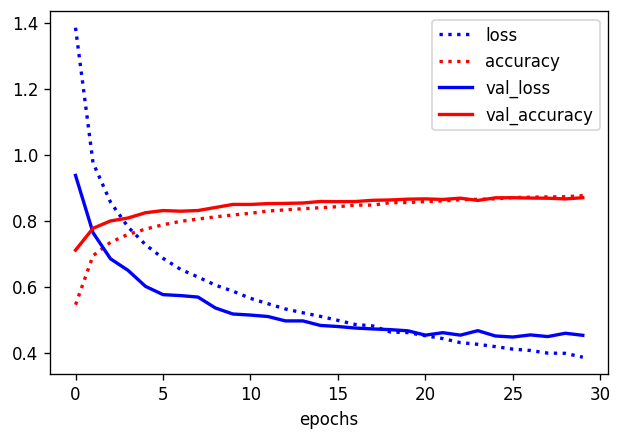

In [25]:
def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.15))

  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=32)

answer_q_1_3 = """
Varying the batch size and learning rate did not increase the accuracy (already experimented with these in 1.1).
Large dropouts and/or L1/L2 regularization decreased the accuracy massively (to 19%).
Some batch normalization and small increasing dropouts (see current model) reduce overfitting and result in a higher accuracy (1.5% higher compared to 1.2) since the model can generalize better.
I increase the dropout after each layer to force deeper layers to regularize more than other layers.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_conv (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
second_conv (Conv2D)         (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
third_conv (Conv2D) 

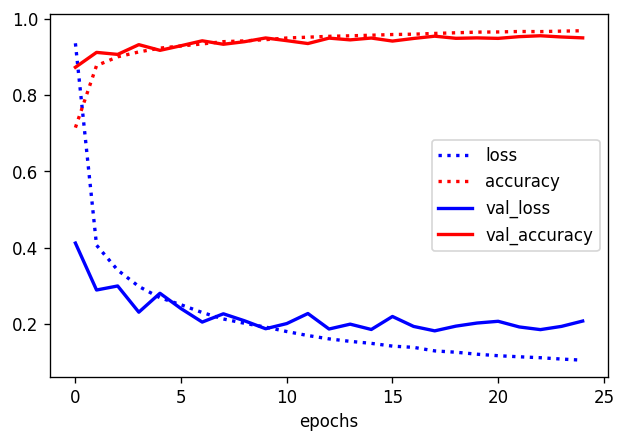

In [16]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1), name='first_conv'))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='second_conv'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='third_conv'))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='fourth_conv'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='fifth_conv'))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="final_conv"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())

  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=32)

answer_q_2_1 = """
I mimic the VGG16 model as a baseline since it is designed for image recognition, which is similar to our task.
I use more filters in deeper layers to preserve information about the input as resolution decreases.
I use increasing dropout to force deeper layers to regularize more than others.
I use MaxPooling layers to reduce the resolution and number of weights (less overfitting), and to increase the translation variance.
Adam outperformed other optimizers, such as Adagrad, etc.
I experimented with batch sizes, kernel sizes, strides, and batch normalization. 
No other configuration I tested lead to a higher accuracy.
I get an accuracy of 95.49%, which is decent compared to modern models, that have losses ranging from 4.9% to 1.02% (https://benchmarks.ai/svhn), and my previous models.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_conv (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
second_conv (Conv2D)         (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
third_conv (Conv2D)  

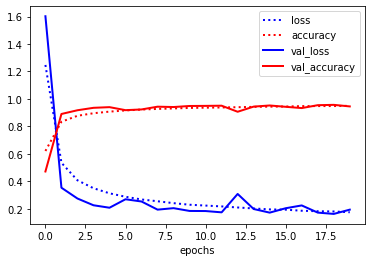

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(#rotation_range=1,
                                  zoom_range=[0.90, 1.00],
                                  height_shift_range=0.1,
                                  width_shift_range=0.1,
                                  fill_mode="nearest")

it_train = train_datagen.flow(rgb2gray(X_train), y_train, batch_size=300)

augmented_split = it_train, rgb2gray(X_val), y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, epochs=20, batch_size=None, generator=True,
               steps_per_epoch=300)

answer_q_2_2 = """
I tried many augmentations, such as applying whitening, sheer, and more.
I get the best result, namely a slightly higher accuracy compared to model 2.1, with subtle augmentation (small shifts and zooming out).
Flipping and rotating the images a lot destroys too much information (e.g. a 6 is not a 6 when flipped or rotated a lot), resulting in lower accuracies.
From the learning curves, we observe that augmentation helps fighting overfitting, which is done by using many variations of the data.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

0.9450095679323195


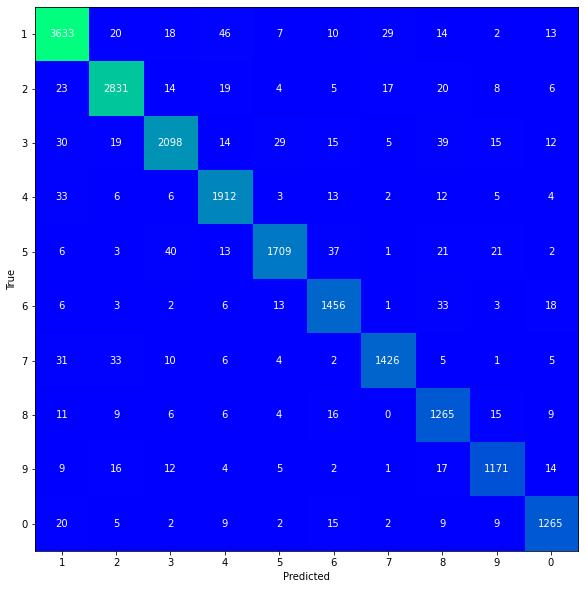

<Figure size 14400x14400 with 0 Axes>

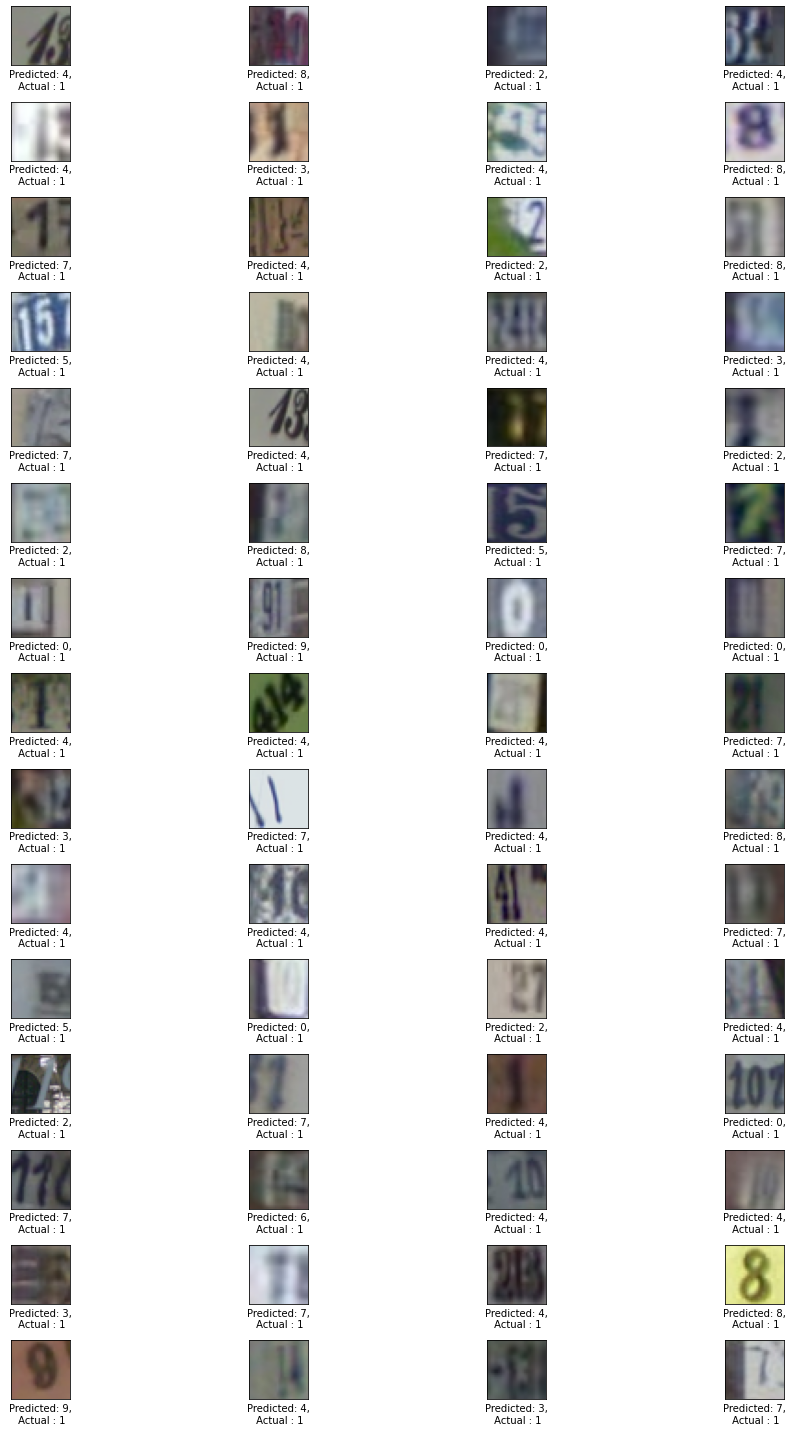

Answer is 798 characters long


In [16]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from functools import reduce

# Convert test data to greyscale
X_test_grey = rgb2gray(X_test)

# Load model_2_2
model = load_model(os.path.join(base_dir, 'model_2_2.h5'))

# Perform the evaluation and store the misclassified samples
y_pred = model.predict(X_test_grey)
missclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

# Store the accuracy of our model on the test data
test_accuracy_3_1 = 1 - (len(missclassified_samples) / len(X_test_grey))
print(test_accuracy_3_1)

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots(figsize=(10, 10))
  im = ax.imshow(cm, cmap=plt.cm.winter)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"])
  ax.set_yticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications(missclassified_number=1, predicted_number=None):
  if predicted_number:
    missclassified_samples = np.intersect1d(np.nonzero((np.argmax(y_test, axis=1)+1)%10 == missclassified_number)[0],
                                          np.nonzero((np.argmax(y_pred, axis=1)+1)%10 == predicted_number)[0])
    print("Number of times we predicted {0}, but where the true label is {1}: {2}".format(predicted_number, missclassified_number, len(missclassified_samples)))
  else:
    missclassified_samples = np.intersect1d(np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0],
                                        np.nonzero((np.argmax(y_test, axis=1)+1)%10 == missclassified_number)[0])
  

  plt.figure(figsize=(200,200))
  # I did not optimize the figure sizes, so you might have to change them when plotting different numbers
  fig, axes = plt.subplots(15, 4, figsize=(15, 20))
  index = 0
  counter = 0
  for nr, i in enumerate(missclassified_samples[:60]):
    axes[index][nr%4].imshow(X_test[i])
    axes[index][nr%4].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[i])+1)%10, (np.argmax(y_test[i])+1)%10))
    axes[index][nr%4].set_xticks(()), axes[index][nr%4].set_yticks(())
    counter = counter + 1 
    if counter == 4:
        counter = 0
        index = index + 1
  plt.tight_layout()
  plt.show()
    

plot_confusion_matrix()

plot_misclassifications(1)

answer_q_3_1 = """
A 5 is often confused for a 3 and a 3 is often confused for a 5. This could be due to the model focusing on the bottom shape that these digits share.
A 3 and 6 are often confused for an 8. This could be since these classes (3, 6) have parts of the shape of an 8. 
A 7 is often confused for a 1, which could be due to a 7 being seen as a rotated 1.
I focus on digit "1". Missclassifications mainly occur when images are blurry, noisy, or when other digits are close to the digit we need to predict in the image.
In the last case, we sometimes predict one of the other digits in the image. This occurs when the digit we need to predict is not in the middle.
In some cases, the true label of the image is incorrect and we predict the actually correct label, which is counted as a missclassification.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

c:\users\nickv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


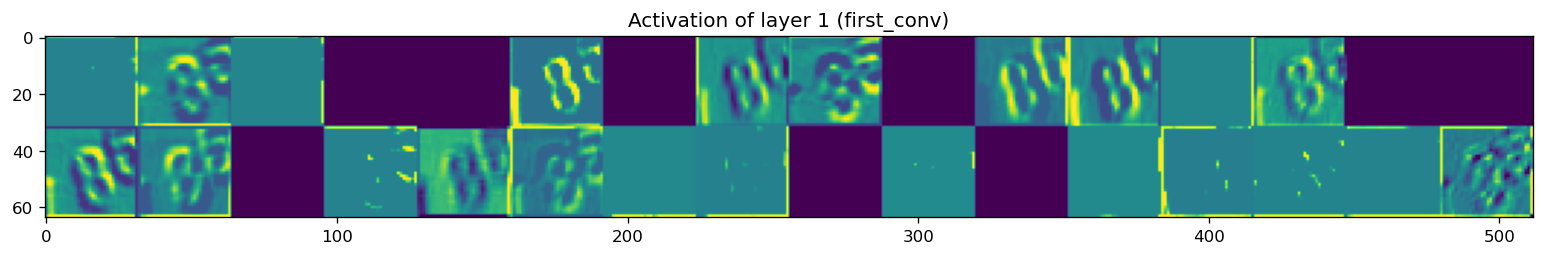

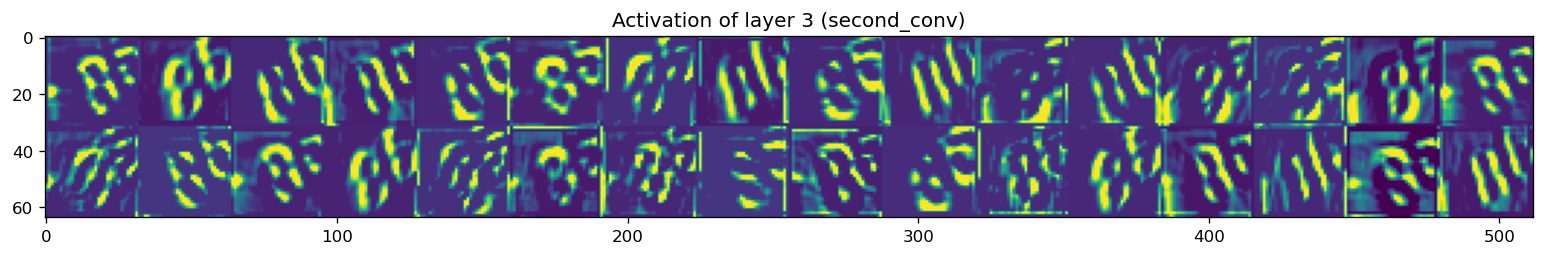

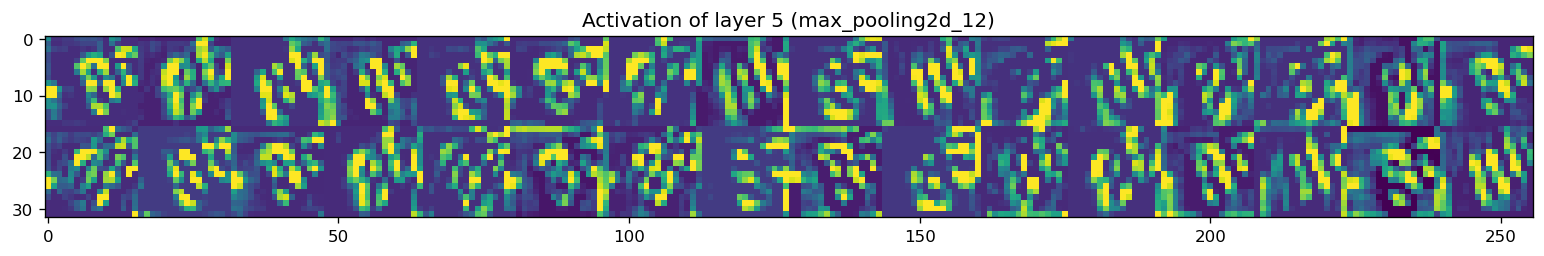

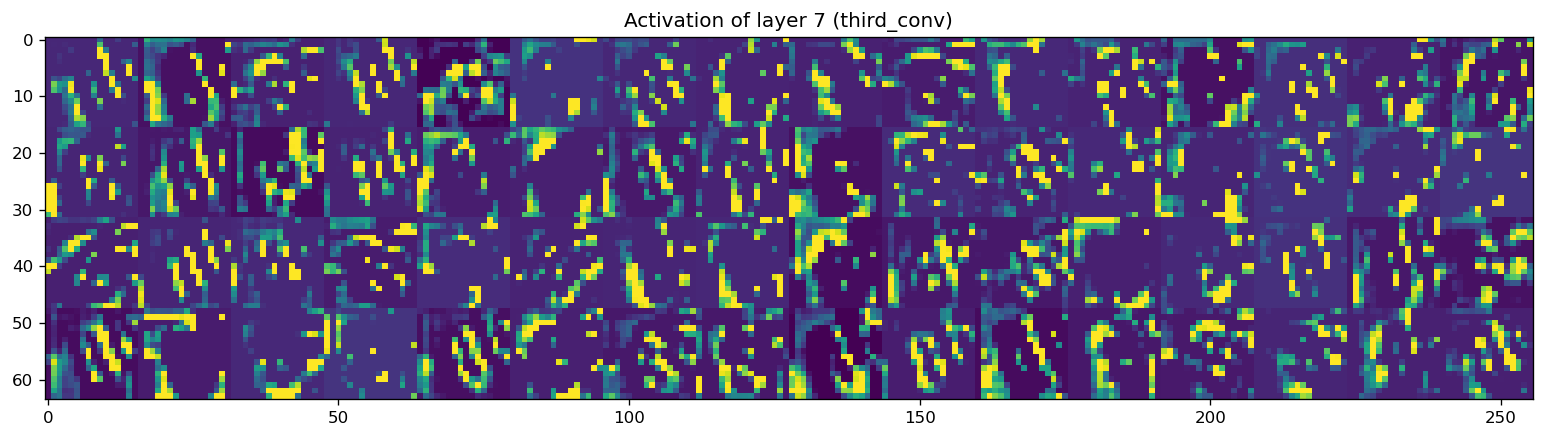

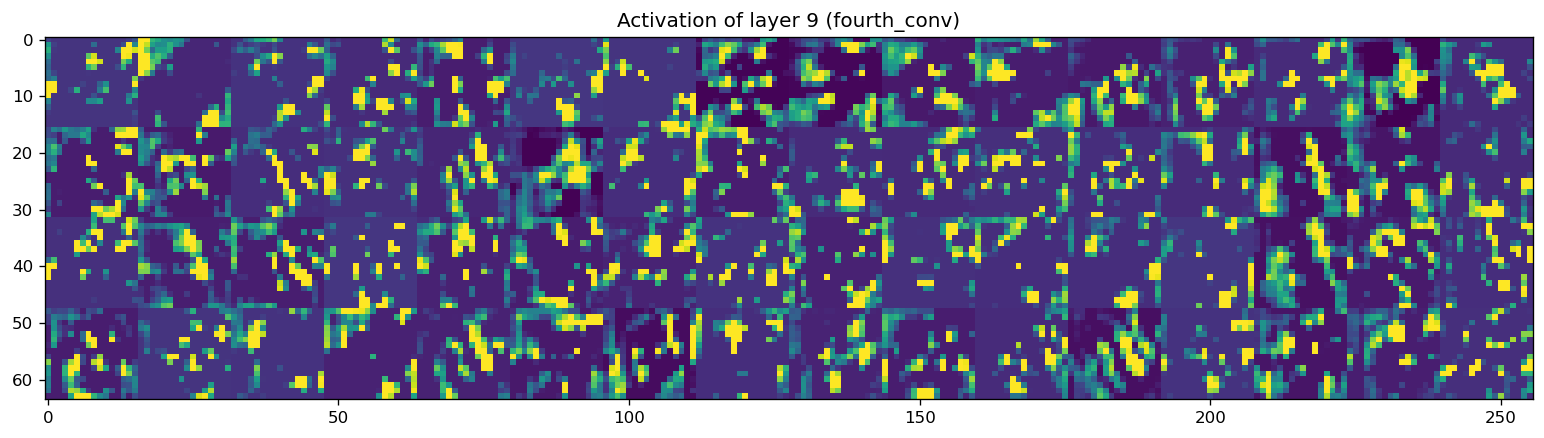

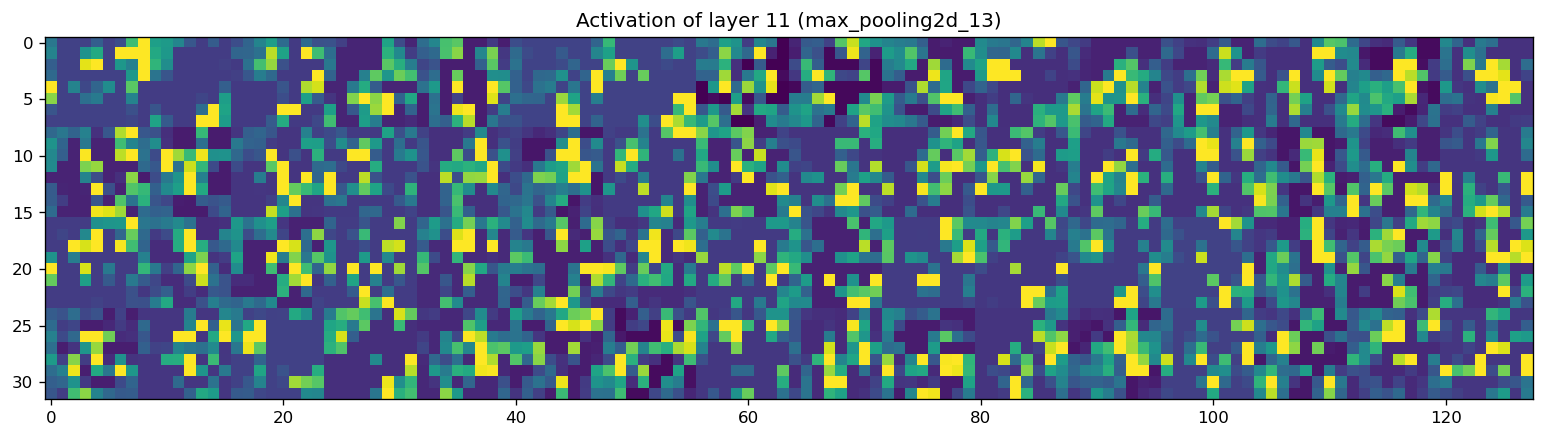

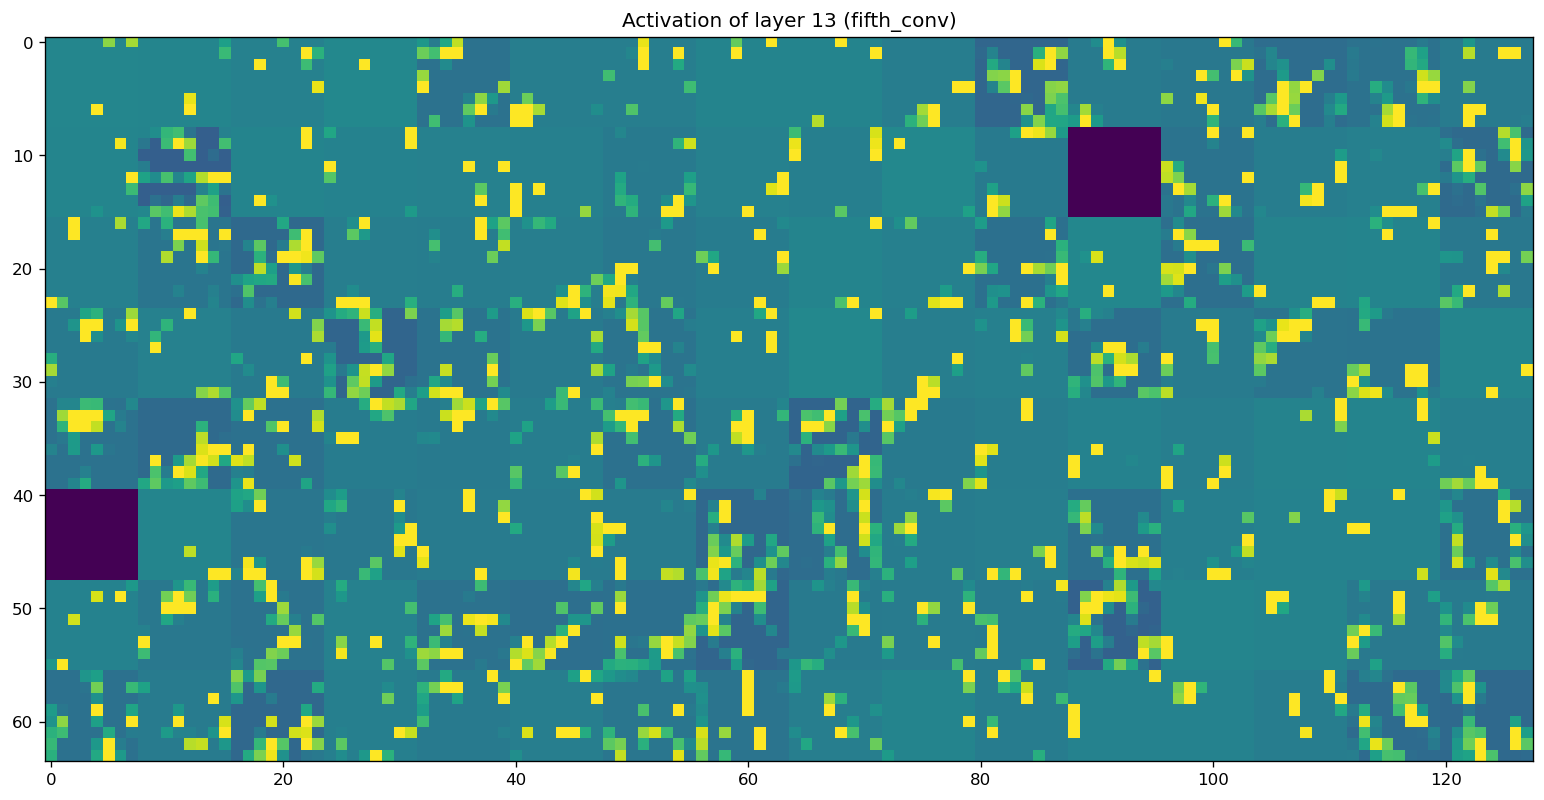

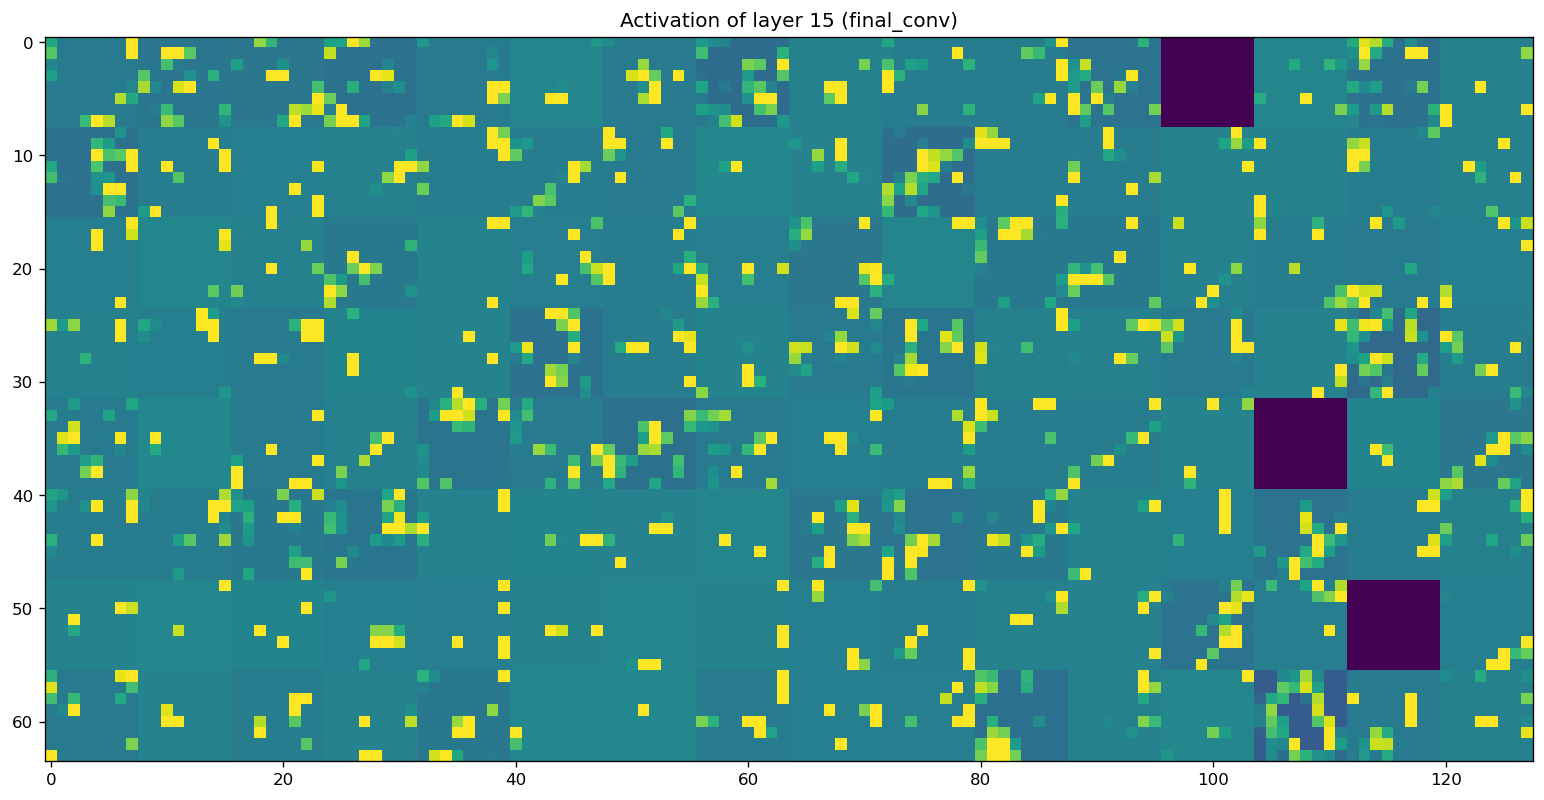

Answer is 499 characters long


In [16]:
def plot_activations():
  img_tensor = rgb2gray(X_test)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0)
  
  # Load model_2_2
  model = load_model(os.path.join(base_dir, 'model_2_2.h5'))
  
  # Extracts the outputs of all layers:
  layer_outputs = [layer.output for layer in model.layers]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  # This will return a list of Numpy arrays: one array per layer activation
  activations = activation_model.predict(img_tensor)

  images_per_row = 16

  layer_names = []
  for layer in model.layers:
    layer_names.append(layer.name)

  # Select the 'most interesting` layers
  conv_layers = [0, 2, 4, 6, 8, 10, 12, 14]
  for layer_index in conv_layers:
    start = layer_index
    end = layer_index+1

    # Display the feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                  :, :,
                                                  col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                              row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

plot_activations()

answer_q_3_2 = """ 
The activations in layer 1 and 3 retain most of the information from the image.
The activations become increasingly abstract and less interpretable the deeper the layer. 
We can still recognize the shape of an 8 in layer 7 (see the bottom left).
Things get hard to interpret from layer 9 onwards since these layers carry more information about the class of the image than the image itself.
Our model is definitely learning about parts of the shape of an 8, which can be seen from layer 9 onwards.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


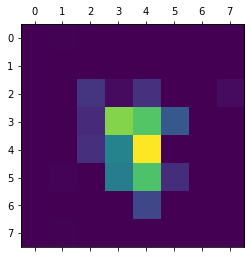

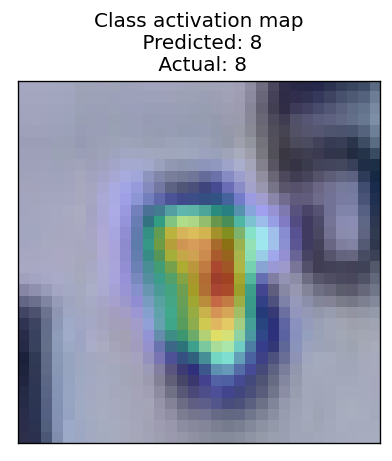

In [15]:
import cv2
from tensorflow.keras import backend as K
# from google.colab.patches import cv2_imshow

def plot_3_3():
  tf.compat.v1.disable_eager_execution()
  K.clear_session()

  # Load the model
  model = load_model(os.path.join(base_dir, 'model_2_2.h5'))
  # model.summary()

  # Specify the entry and layer to use
  index = 0
  name_layer = 'final_conv' # Can be 'first_conv', 'second_conv', etc

  # Select the image based on the index
  x = rgb2gray(X_test)[index]

  # We add a dimension to transform our array into a "batch"
  # of size (1, 32, 32, 1)
  x = np.expand_dims(x, axis=0)

  # Make a prediction for the image
  preds = model.predict(x)
  selected_image_output = model.output[:, np.argmax(preds[0])]

  # The is the output feature map of the `name_layer` layer
  last_conv_layer = model.get_layer(name_layer)

  # This is the gradient of the `index` class with regard to
  # the output feature map of `name_layer`
  grads = K.gradients(selected_image_output, last_conv_layer.output)[0]

  # This is a vector of shape (128,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `name_layer`,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image of two elephants
  pooled_grads_value, conv_layer_output_value = iterate([x])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the class
  for i in range(pooled_grads.shape[0]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.show()

  # TODO: We can improve this by simple layering the images using imshow
  # Save the entry as an image
  plt.imsave('number.png', X_test[index])

  # We use cv2 to load the image from the test set
  img = cv2.imread('number.png')

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.3 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  # Save the image to disk
  cv2.imwrite('activation_map.png', superimposed_img)

  # Plot the image
  img = cv2.imread('activation_map.png')
  RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.rcParams['figure.dpi'] = 120
  plt.imshow(RGB_im)
  plt.title('Class activation map\n Predicted: {0}\n Actual: {1}'.format(np.argmax(preds)+1%10, np.argmax(y_test[0])+1%10))
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

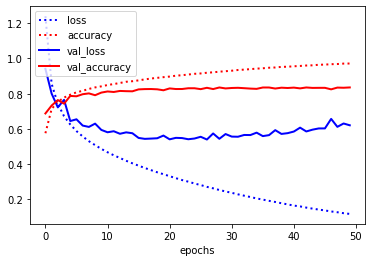

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  # Instantiate the VGG16 model without the dense layers
  conv_base = VGG16(weights='imagenet', 
                    include_top=False,
                    input_shape=(32, 32, 3))
  
  conv_base.trainable = True
  set_trainable = False
  conv_base.summary()

  # Freeze all layers except some ones
  # block5_conv1, block5_conv2, block5_conv3, block5_pool
  for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
       set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  # Create our model with an extra dense layer
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer=optimizers.Adagrad(lr=1e-3),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Evaluate the resulting model
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)

answer_q_4_1 = """
I use many epochs and a small learning rate so that my model doesn't unlearn too much (no catastrophic forgetting).
Unfreezing none, the last, the last two, the last three, and all layers in the final block results in accuracies of 49.14%, 49.15%, 70.26%, 78.25% and 83.54%.
The accuracy improves when unfreezing more layers because the model can fine-tune more based on our task as a result.
The model overfits more when unfreezing more layers. This means that my best model overfits quite a bit.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [28]:
import pickle
import gzip

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import os.path
from os import path

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model(os.path.join(base_dir, 'model_4_1.h5'))
  base_model = model.layers[0]
  base_model.summary()
  store_embedding(np.reshape(base_model.predict(X_val), (len(X_val), 512)), "val_output")
  store_embedding(np.reshape(base_model.predict(X_train), (len(X_train), 512)), "train_output")
  store_embedding(np.reshape(base_model.predict(X_test), (len(X_test), 512)), "test_output")

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  return Pipeline([("scaler", Normalizer()), ("svm", SVC(kernel="poly"))])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  number_of_entries = None

  train_path = base_dir + '/train_output_embedding.p'
  test_path = base_dir + '/test_output_embedding.p'

  print(os.path.isfile(train_path))
  if (not os.path.isfile(train_path)) or not os.path.isfile(test_path):
    print("Store embeddings")
    store_embeddings()

  y_train_output = [(np.argmax(entry) + 1) % 10 for entry in y_train]
  y_test_output = [(np.argmax(entry) + 1) % 10 for entry in y_test]

  if number_of_entries:
    return evaluate_pipeline(generate_pipeline(), 
                            load_embedding("train_output")[:number_of_entries], 
                            y_train_output[:number_of_entries], 
                            load_embedding("test_output")[:number_of_entries], 
                            y_test_output[:number_of_entries])
  else:
    return evaluate_pipeline(generate_pipeline(), 
                            load_embedding("train_output"), 
                            y_train_output, 
                            load_embedding("test_output"), 
                            y_test_output)

print("Test score: {0}".format(evaluation_4_2(X_train, y_train, X_test, y_test)))

answer_q_4_2 = """
I experimented with a MinMaxScaler, StandardScaler, and Normalizer in combination with SVCs, RFs, kNN, and logistic regression while varying their parameters.
I picked the pipeline based on the highest accuracy on the validation data.
The accuracy was often a bit lower compared to model 4.1, probably since we embed the data based on part of that model.
The best (tested) pipeline on the validation data results in an accuracy of 83.60% on the test data, which does not beat my best model.
"""
print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

True
Test score: 0.8360358545674288
Pipeline: Pipeline(memory=None,
         steps=[('scaler', Normalizer(copy=True, norm='l2')),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 492 characters long
